# Identitas

- Nama : Rizvan Dwikifirdaus
- NIM : 10117060
- Universitas : Institut Teknologi Bandung
- Tanggal Mulai : 14 November 2020
- Sumber Dataset : takemeout.csv

# Library dan Dataset

In [356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [357]:
rawdata = pd.read_csv('takemeout.csv')

# Eksplorasi Data

Mencari insight dari data dengan bantuan beberapa visualisasi data dan statistika deskriptif

## Statistika Deskriptif

- Terdapat 101 observasi dari dataset takemeout
- Dataset ini berisi informasi mengenai 5 bagian love language seeseorang dengan masing masing aspek memiliki nilai dari skala 1-5 (tidak penting hingga paling penting)

In [358]:
rawdata.head(3)

,Timestamp,Siapa nama kamu?,Cewek atau cowok nih?,Seberapa penting quality time bareng calon pacar untuk kamu?,Seberapa penting physical touch sama calon pacar untuk kamu?,Seberapa penting word of affirmation dari calon pacar untuk kamu?,Seberapa penting dapet kado dari calon pacar untuk kamu?,Seberapa penting bantuan dari calon pacar untuk kamu?
0,2020/10/31 3:39:25 PM GMT+7,A**************,Cowok,5,5,4,1,3
1,2020/10/31 3:39:36 PM GMT+7,L****,Cewek,5,5,3,2,2
2,2020/10/31 3:39:38 PM GMT+7,Y***********,Cowok,4,3,4,4,4


In [359]:
rawdata.describe()

,Seberapa penting quality time bareng calon pacar untuk kamu?,Seberapa penting physical touch sama calon pacar untuk kamu?,Seberapa penting word of affirmation dari calon pacar untuk kamu?,Seberapa penting dapet kado dari calon pacar untuk kamu?,Seberapa penting bantuan dari calon pacar untuk kamu?
count,101.000000,101.000000,101.000000,101.000000,101.000000
mean,4.099010,3.168317,3.722772,2.732673,3.752475
std,1.212476,1.334686,1.209287,1.325829,1.143730
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,2.000000,3.000000,2.000000,3.000000
50%,5.000000,3.000000,4.000000,3.000000,4.000000
75%,5.000000,4.000000,5.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000


## Data Cleaning

- Menghapus kolom timestamp karena tidak ada pengaruh waktu

In [360]:
rawdata.columns = ['timestamp', 'nama', 'gender', 'quality', 'physical', 'affirmation', 'gift', 'service']
data = rawdata.drop(['timestamp'], axis = 1)

## Visualisasi Data - All Gender

In [361]:
def countplot_persentase(data, colname, title):
    values = data[colname].value_counts().values
    plt.figure(figsize = (7, 5))
    clr = ['lightgrey' if (x < max(values)) else 'crimson' for x in values ]
    ax = sns.countplot(data[colname], palette = clr)
    ax.set(title = title)
    for i, p in enumerate(ax.patches):
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 0.5, '{} ({:.2%})'.format(values[i], values[i]/data.shape[0]), ha="center")
        
def countplot_multiple(data, cols, title):
    fig, axes = plt.subplots(3, 2, sharey=True, figsize=(20,16))
    fig.suptitle(title)
    axes = axes.flatten()
    for i in range(len(cols)):
        values = data[cols[i]].value_counts().sort_index().values
        clr = ['lightgrey' if (x < max(values)) else 'crimson' for x in values ]
        sns.countplot(ax = axes[i], x = cols[i], data = data, palette=clr)
        axes[i].set_title(cols[i])
        for j, p in enumerate(axes[i].patches):
            height = p.get_height()
            axes[i].text(p.get_x() + p.get_width()/2., height + 0.5, '{} ({:.2%})'.format(values[j], values[j]/data.shape[0]), ha="center")
    fig.delaxes(axes[-1])
    
def boxplot_multiple(data, cols, title):
    plt.figure(figsize = (7, 5))
    clr = ['lightgrey' if (x < max(data[cols].mean())) else 'crimson' for x in data[cols].mean()]
    ax = sns.boxplot(x="variable", y="value", data=pd.melt(data[cols]), palette = clr)
    ax.set(title = title)

- Aspek utama yang paling diperhatikan oleh mayoritas responden adalah quality time
- Terdapat distribusi yang imbalance pada gender, sebesar 80% responden merupakan laki-laki

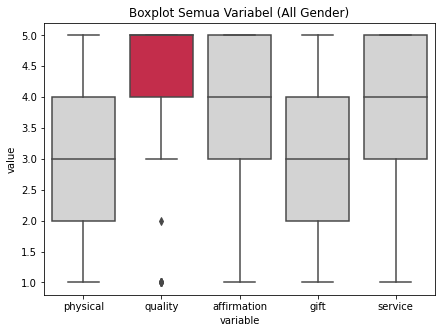

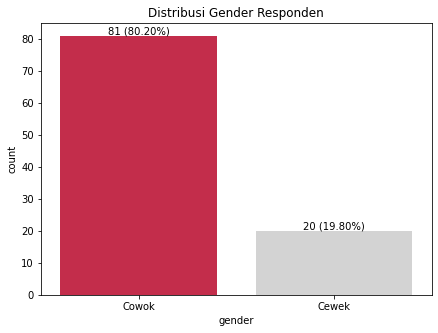

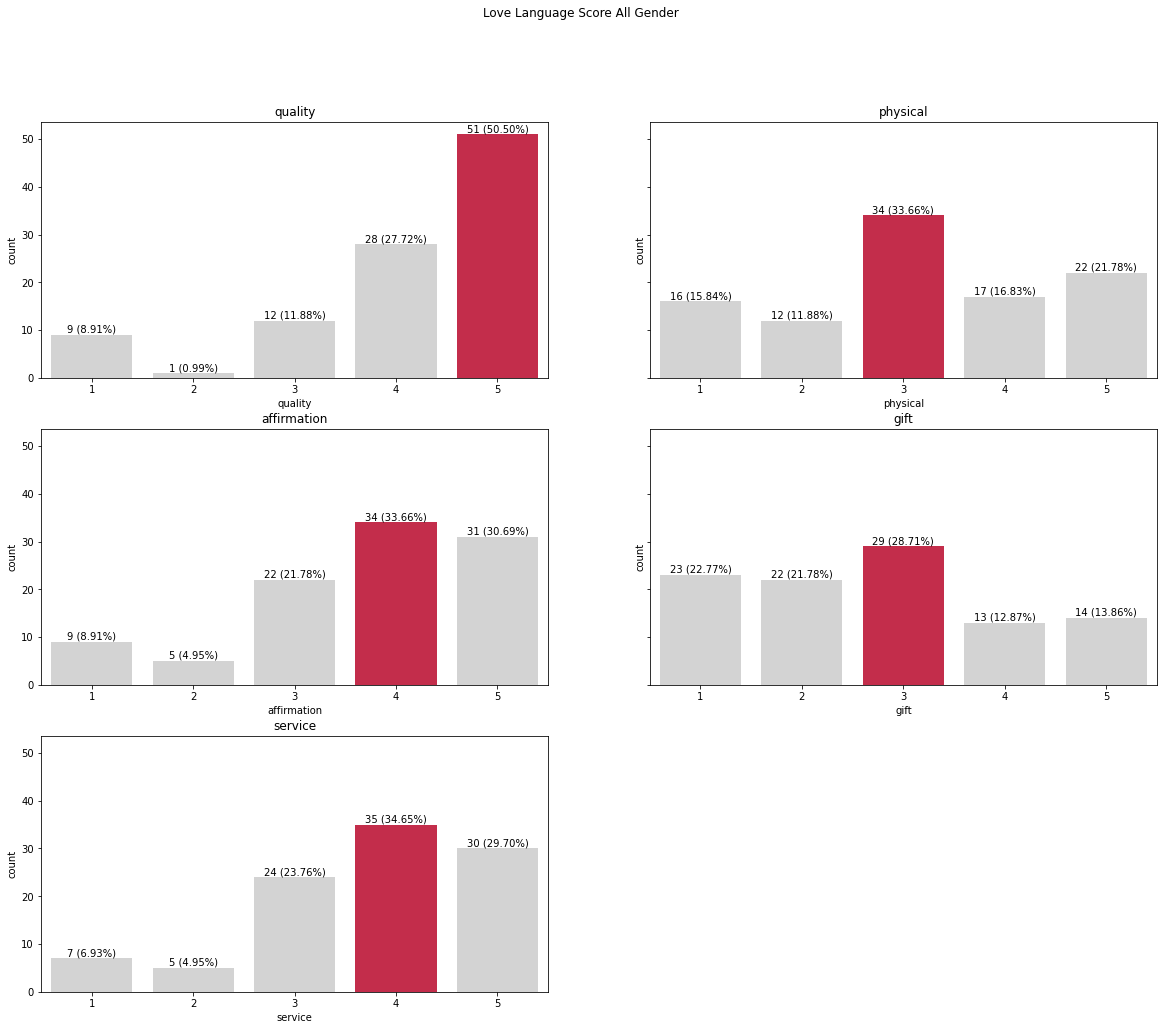

In [362]:
boxplot_multiple(data, ['physical','quality','affirmation','gift','service'], title = 'Boxplot Semua Variabel (All Gender)')
countplot_persentase(data, 'gender', 'Distribusi Gender Responden')
countplot_multiple(data, ['quality','physical','affirmation','gift','service'], 'Love Language Score All Gender')

## Visualisasi Data - Laki laki

- Aspek utama yang diperhatikan oleh mayoritas responden pria adalah quality time
- Dari kelima aspek, yang paling kurang diprioritaskan oleh mayoritas responden pria adalah gift

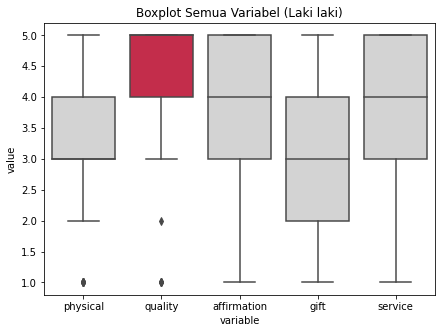

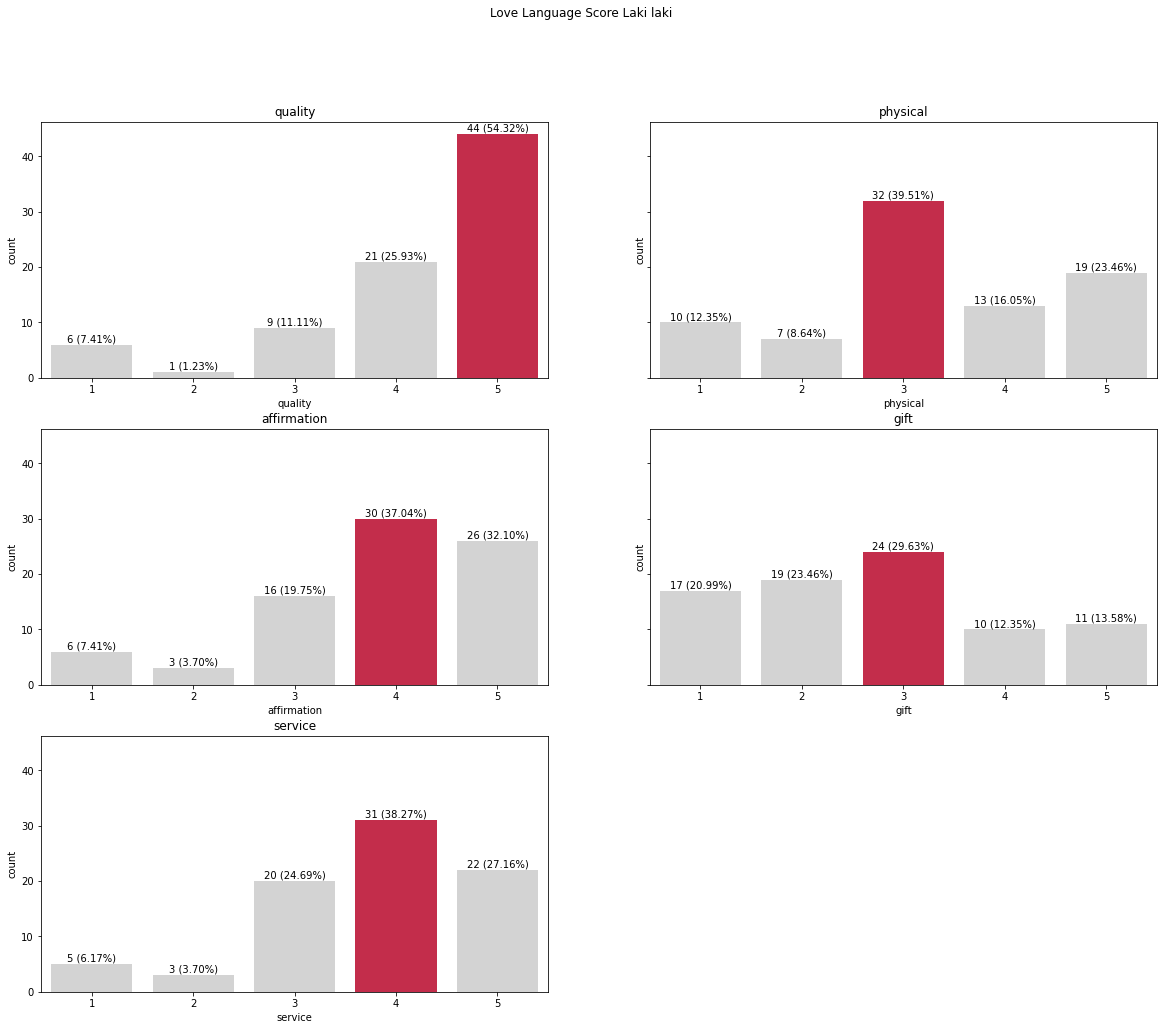

In [363]:
data_laki = data.groupby('gender').get_group('Cowok')
boxplot_multiple(data_laki, ['physical','quality','affirmation','gift','service'], title = 'Boxplot Semua Variabel (Laki laki)')
countplot_multiple(data_laki, ['quality','physical','affirmation','gift','service'], 'Love Language Score Laki laki')

## Visualisasi Data - Perempuan

- Dua aspek utama yang paling diperhatikan oleh responden perempuan adalah quality time dan act of service
- Aspek dengan prioritas terendah oleh responden perempuan adalah physical touch

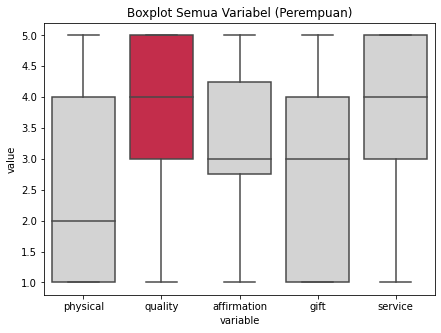

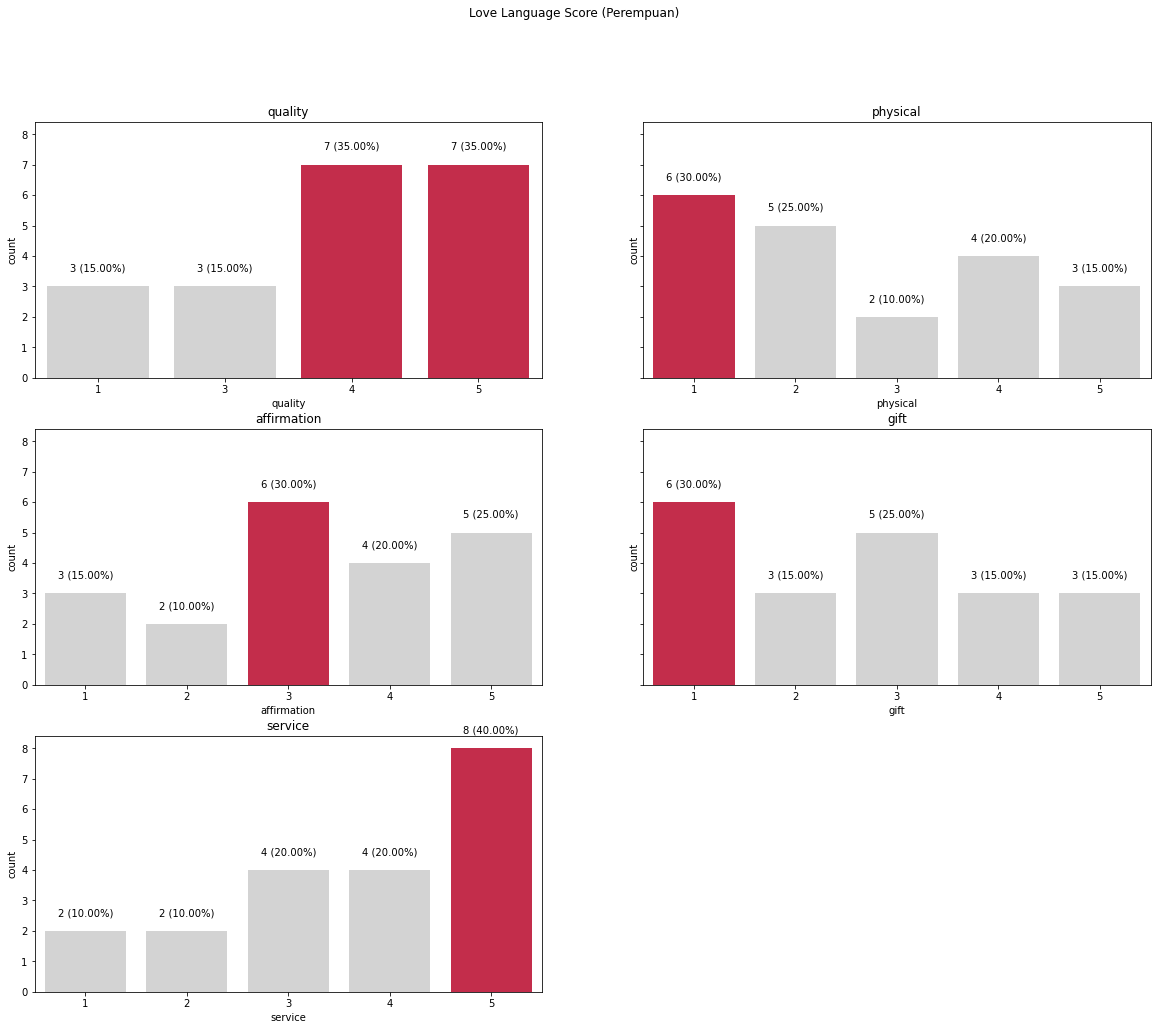

In [364]:
data_perempuan = data.groupby('gender').get_group('Cewek')
boxplot_multiple(data_perempuan, ['physical','quality','affirmation','gift','service'], title = 'Boxplot Semua Variabel (Perempuan)')
countplot_multiple(data_perempuan, ['quality','physical','affirmation','gift','service'], 'Love Language Score (Perempuan)')

## Cari Jodoh

In [365]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=7).fit(data_perempuan[['quality', 'physical', 'affirmation', 'gift', 'service']])

#Love Language Values - Quality Time, Physical Touch, Words of Affirmation, Gift, Act of Service
values = [5,2,4,1,3]

distances, indices = nbrs.kneighbors(np.array(values).reshape(1,-1))
d = distances.tolist()[0]
idx = indices.tolist()[0]

In [366]:
data_perempuan = data_perempuan.reset_index(drop = True)

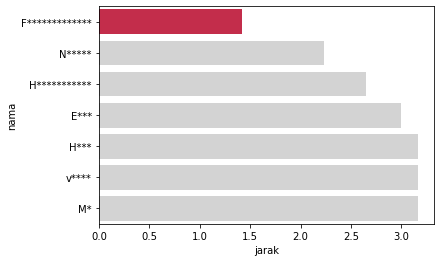

In [367]:
clr = ['lightgrey' if (x > min(d)) else 'crimson' for x in d ]
sns.barplot(x = d, y = data_perempuan['nama'][idx], palette = clr).set(xlabel='jarak', ylabel='nama')
plt.show()

In [368]:
data_perempuan.iloc[idx[0]]

nama           F*************
gender                  Cewek
quality                     4
physical                    2
affirmation                 3
gift                        1
service                     3
Name: 2, dtype: object